## Clustering Demo

<hr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(100)

In [3]:
gen1 = 0.5 + 0.5*np.random.rand(100, 2)
gen2 = -0.2 + 0.9*np.random.rand(100, 2)
gen3 = -0.5 + 0.5*np.random.rand(100, 2)

X = np.vstack((gen1, gen2, gen3))

In [4]:
X.shape

(300, 2)

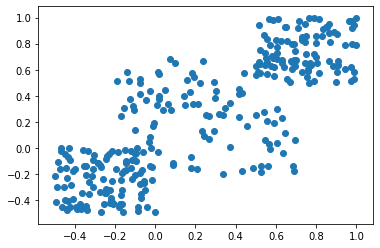

In [5]:
plt.scatter(X[:, 0], X[:, 1])

In [6]:
# Sum Square Error
# Euclidean Distance
# K-Means

In [7]:
def SSError(X, K, centers, clusters):
    error = 0
    for k in range(K):
        error += np.sum((centers[k] - X[clusters==k])**2)
    return error

In [8]:
X[1]

array([0.7122588 , 0.92238807])

In [9]:
X[2]

array([0.50235943, 0.56078456])

In [10]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2, axis=1))

In [11]:
def Kmean(X, K, nit):
    np.random.seed(100)
    
    m = X.shape[0] # samples shape
    n = X.shape[1] # features shape
    
    std = np.std(X, axis = 0)
    mean = np.mean(X, axis = 0)
    
    # Centroid initialize 
    centers = np.random.rand(K, n) * std + mean
    centers_new = np.zeros((centers.shape))
    
    clusters = np.zeros((m))
    
    distances = np.zeros((m, K)) # (samples, K-cluster)
                               # which col got the min it mean m samples
                               # is in that cluster
    error = []
    
    for i in range(nit):
        
        for k in range(K):
            distances[:, k] = euclidean_distance(centers[k], X)
        
        clusters = np.argmin(distances, axis = 1)
        
        for k in range(K):
            centers_new[k] = np.mean(X[clusters == k], axis = 0)
        
        centers = centers_new.copy()
        error.append(SSError(X, K, centers, clusters))

    return clusters, centers, error

In [12]:
K = 3
nit = 300

clusters, centers, error = Kmean(X, 3, 10)

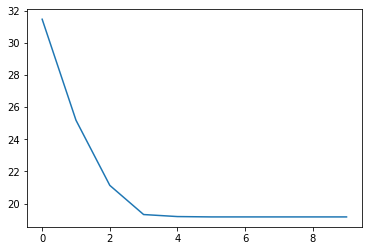

In [13]:
plt.plot(error)

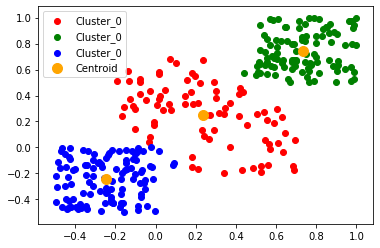

In [14]:
plt.scatter(X[clusters == 0, 0], X[clusters == 0, 1], c = 'r',
           label = 'Cluster_0')
plt.scatter(X[clusters == 1, 0], X[clusters == 1, 1], c = 'g',
           label = 'Cluster_0')
plt.scatter(X[clusters == 2, 0], X[clusters == 2, 1], c = 'b',
           label = 'Cluster_0')

plt.scatter(centers[:, 0], centers[:, 1], c = 'orange', 
           label = 'Centroid', s = 100)
plt.legend()
plt.show()

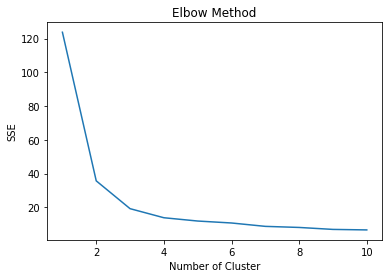

In [15]:
# Elbow method

SSE_list = []
nit = 300

for cluster in range(1, 11):
    clusters, centers, error, = Kmean(X, cluster, nit)
    SSE_list.append(error[-1])
    
plt.plot(range(1, 11), SSE_list)
plt.title('Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('SSE')
plt.show()

In [16]:
clusters, centers, error = Kmean(X, 3, nit)

## Lab 10
<hr>
<br>

### 1. k-mean Clustering

In [17]:
from sklearn.datasets import load_iris
iris = load_iris()

In [18]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [19]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [234]:
X = iris.data[:, [2, 3]]
y = iris.target

#### write normalise function

In [143]:
def normalise(X):
    X_norm = (X - np.min(X, axis=0))/(np.max(X, axis=0) - np.min(X, axis=0))
    X_max = np.max(X, axis=0)
    X_min = np.min(X, axis=0)
    return X_norm, X_max, X_min

In [144]:
def centroidCreate(X, K, rseed):
    np.random.seed(rseed)
    
    n = X.shape[1] # features shape
    std, mean = np.std(X, axis = 0), np.mean(X, axis = 0)
    
    # Centroid initialize 
    centers = np.random.rand(K, n) * std + mean
    return centers

In [145]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2, axis=1))

In [146]:
def SSE(X, K, centers, clus_ind):
    error = 0
    for k in range(K):
        error += np.sum((centers[k] - X[clus_ind==k])**2)
    return error

In [173]:
def kmean(X, K, nit, rseed):
    np.random.seed(rseed)
    m = X.shape[0]
    
    centers = centroidCreate(X, K, rseed)
    centers_new = np.zeros((centers.shape))
    
    clus_ind = np.zeros((m))
    distances = np.zeros((m, K))
    errorList = []
    
    for i in range(nit):
        for k in range(K):
            distances[:, k] = euclidean_distance(centers[k], X)
        clus_ind = np.argmin(distances, axis = 1)
        
        for k in range(K):
            centers_new[k] = np.mean(X[clus_ind == k], axis = 0)
            
        centers = centers_new.copy()
        errorList.append(SSE(X, K, centers, clus_ind))
    
    return centers, clus_ind, errorList

In [174]:
K = 3
nit = 300
rseeed = 0
X_norm, X_max, X_min = normalise(X)

centers, clus_ind, errorList = kmean(X, 3, 10, 0)

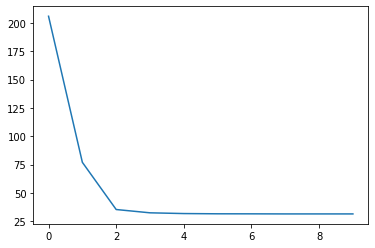

In [175]:
plt.plot(errorList)

In [176]:
print(centers)

[[4.29259259 1.35925926]
 [5.62608696 2.04782609]
 [1.462      0.246     ]]


In [178]:
print(clus_ind)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1]


In [159]:
print(errorList)

[205.85363636363635, 76.93709195402297, 35.29269381598794, 32.381411517444306, 31.730095238095238, 31.51776298701299, 31.482686868686873, 31.412885668276978, 31.412885668276978, 31.412885668276978]


C:\Users\theka\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\theka\anaconda3\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


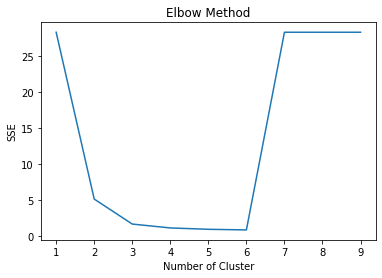

In [160]:
# # Elbow method

# SSE_list = []
# nit = 10

# m, rseed = X_norm.shape[0], 0

# for cluster in range(1, 10):
#     centers, clus_ind, errorList = kmean(X_norm, cluster, nit, rseed)
#     SSE_list.append(errorList[-1])
    
# plt.plot(range(1, 10), SSE_list)
# plt.title('Elbow Method')
# plt.xlabel('Number of Cluster')
# plt.ylabel('SSE')
# plt.show()

In [182]:
centers

array([[4.29259259, 1.35925926],
       [5.62608696, 2.04782609],
       [1.462     , 0.246     ]])

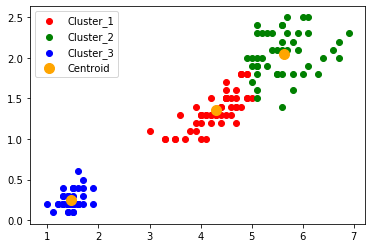

In [183]:
plt.scatter(X[clus_ind == 0, 0], X[clus_ind == 0, 1], c = 'r',
           label = 'Cluster_1')
plt.scatter(X[clus_ind == 1, 0], X[clus_ind == 1, 1], c = 'g',
           label = 'Cluster_2')
plt.scatter(X[clus_ind == 2, 0], X[clus_ind == 2, 1], c = 'b',
           label = 'Cluster_3')

plt.scatter(centers[:, 0], centers[:, 1], c = 'orange', 
           label = 'Centroid', s = 100)
plt.legend()
plt.show()

In [184]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

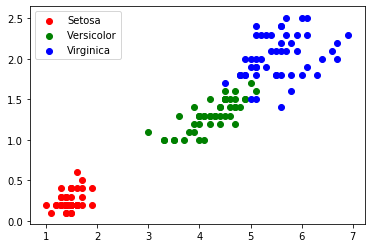

In [189]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], c = 'r',
           label = 'Setosa')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c = 'g',
           label = 'Versicolor')
plt.scatter(X[y == 2, 0], X[y == 2, 1], c = 'b',
           label = 'Virginica')

# plt.scatter(centers[:, 0], centers[:, 1], c = 'orange', 
#            label = 'Centroid', s = 100)
plt.legend()
plt.show()

In [ ]:
# cluster_1 with Versicolor (1)
# cluster_2 with Veriginica (2)
# cluster_3 with Setosa (0)

In [214]:
def accuracy(y_pred, y):
    acc = np.sum(y_pred == y)/y_pred.shape[0]
    return acc

In [227]:
# for i in range(clus_ind.shape[0]):
#     if clus_ind[i] == 0:
#         clus_ind[i] = 1
#     elif clus_ind[i] == 1:
#         clus_ind[i] = 2
#     elif clus_ind[i] == 2:
#         clus_ind[i] = 0


In [236]:
acc = accuracy(clus_ind, y)
acc

0.9466666666666667

In [308]:
# obtained mean and std of k-mean and actual
clus_mean = np.array(())
real_mean = np.array(())
for i in range(3):
    mean = np.mean(X[clus_ind == i], axis=0)
    clus_mean.append(mean)
    mean = np.mean(X[y == i], axis=0)
    real_mean.append(mean)
    

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [319]:
mean1 = np.mean(X[clus_ind == 0], axis=0)
mean2 = np.mean(X[clus_ind == 1], axis=0)
mean3 = np.mean(X[clus_ind == 2], axis=0)

In [320]:
clus_mean = np.vstack((mean1, mean2, mean3))

In [323]:
clus_mean[:, 0]

array([1.462     , 4.29259259, 5.62608696])

In [324]:
mean1 = np.mean(X[y == 0], axis=0)
mean2 = np.mean(X[y == 1], axis=0)
mean3 = np.mean(X[y == 2], axis=0)
real_mean = np.vstack((mean1, mean2, mean3))

In [325]:
real_mean[:, 0]

array([1.462, 4.26 , 5.552])

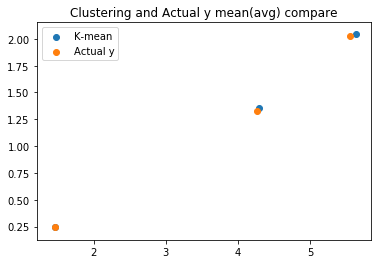

In [330]:
# cluster mean plot
plt.scatter(clus_mean[:, 0], clus_mean[:, 1], label='K-mean')
plt.scatter(real_mean[:, 0], real_mean[:, 1], label='Actual y')
plt.title('Clustering and Actual y mean(avg) compare')
plt.legend()
plt.show()

In [332]:
# std compare
std1 = np.std(X[clus_ind == 0], axis=0)
std2 = np.std(X[clus_ind == 1], axis=0)
std3 = np.std(X[clus_ind == 2], axis=0)
clus_std = np.vstack((std1, std2, std3))

In [333]:
std1 = np.std(X[y == 0], axis=0)
std2 = np.std(X[y == 1], axis=0)
std3 = np.std(X[y == 2], axis=0)
real_std = np.vstack((std1, std2, std3))

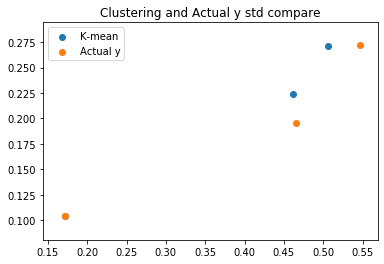

In [334]:
# cluster mean plot
plt.scatter(clus_std[:, 0], clus_std[:, 1], label='K-mean')
plt.scatter(real_std[:, 0], real_std[:, 1], label='Actual y')
plt.title('Clustering and Actual y std compare')
plt.legend()
plt.show()

In [316]:
x = np.vstack((x, mean))
x

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 0 and the array at index 1 has size 2

In [303]:
clus_mean

[array([1.462, 0.246]),
 array([4.29259259, 1.35925926]),
 array([5.62608696, 2.04782609])]

In [299]:
clus_mean

[array([1.462, 0.246]),
 array([4.29259259, 1.35925926]),
 array([5.62608696, 2.04782609])]

In [300]:
real_mean[:][0]

array([1.462, 0.246])

In [ ]:
plt.scatter(clus_mean[])